In [2]:
import input as i
import alg as a
import alg_google as a_g
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

# Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [204]:
w = .1

ins = i.Instance(B=60, predictor_std=0) # a random instant D
print("D = ", ins.D, " B = ", ins.B)
alg = a.DPOA(ins, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  82  B =  60
1.900-consistant


# Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated multiple times; $B = 50$.

In [80]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c_ratio[idx, j] = alg/opt
        


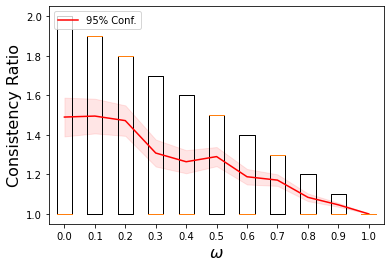

In [81]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### Time-deminishing Noisy Predictor 

In [122]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 1000
c2_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c2_ratio[idx, j] = alg/opt
        


In [125]:
avg_ratio = np.mean(c2_ratio, axis=1)
ci = 1.96 * np.std(c2_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)


robust_ratio = [(2-w)/(1-w) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label="DPOA", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

<ipython-input-125-45fa195b9939>:9: RuntimeWarning: divide by zero encountered in double_scalars
  robust_ratio = [(2-w)/(1-w) for w in w_list]


### Time Invariant Predictor
$\sigma \in [0,2\times B]$ 

In [13]:
reload(a); reload(i)
w = 0.1
std_list = np.arange(0,100,10)
repeat = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg/opt

In [16]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
ins = i.Instance(predictor_std=5, time_dependant=True); rsol = ag.RPOA_google(ins, w); opt = a.OPT(ins); rsol/opt



plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

# plt.boxplot(r_ratio.transpose());
ratio_theory = (2-w)/ (1-w)
plt.plot([1, len(std_list)], [ratio_theory, ratio_theory], label = "Theoretical Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="DPOA(%.1f)"%w, color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')


[1.4293     1.49447103 1.51345019 1.48391425 1.50396156 1.47568209
 1.48722104 1.46300539 1.49284947 1.51329692]


# Experiment 2: RPOA($\omega$)

In [82]:
reload(a); reload(i)
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

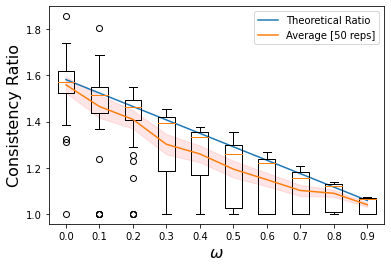

In [83]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [(np.exp(1)-0)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - 1)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [%d reps]"%alg_reps)
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



### Time-deminishing predictor

In [118]:
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt
        



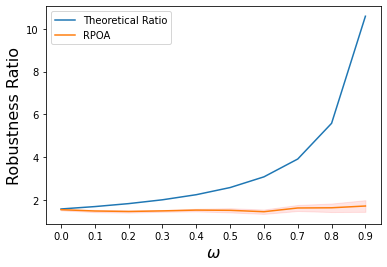

In [121]:
        
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

robust_ratio = [(np.exp(1)-w)/((np.exp(1)-1)*(1-w)) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label = "RPOA")
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()

### Time-invariant Noisy Predictor 
$\sigma \in [0,10, 2\times B]$ 

In [15]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
alg_reps = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        alg_avg = alg_total/alg_reps
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg_avg/opt

[1.29640507 1.52270274 1.52714365 1.5763445  1.55262845 1.59056987
 1.66150531 1.60236463 1.53322645 1.55609905]
[0.04525667 0.07380414 0.05345063 0.05936001 0.0559097  0.06938443
 0.0637513  0.06060975 0.06260227 0.05142393]


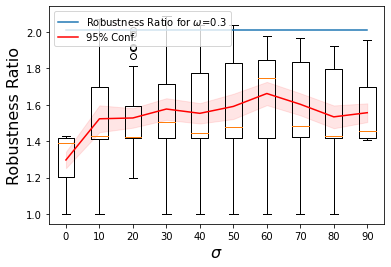

In [16]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (np.exp(1)-w)/ ((np.exp(1)-1) * (1-w) )
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Robustness Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

## Comparison: OLPA vs RLPA vs Google

In [296]:

w_list = np.linspace(0,.9999, 100)
std_list = np.arange(0,100,1)
repeat = 10000
B = 20


sol_ratio = np.zeros((len(w_list),len(std_list), repeat))
rand_ratio = np.zeros((len(w_list),len(std_list), repeat))
gsol_ratio = np.zeros((len(w_list),len(std_list), repeat))
grand_ratio = np.zeros((len(w_list),len(std_list), repeat))

t1 = time.time()
t_ = t1
for wid, w in enumerate(w_list):
    print("ðŸ”´ w = %-.2f   ðŸ•‘ %4.2fs    +%-4.2fs"%(w, time.time()-t1, time.time()-t_))
    for idx,std in enumerate(std_list):
        print("std =", std)
        for j in np.arange(repeat):
            ins = i.Instance(B=B, predictor_std=std)
            opt = a.OPT(ins)
            
            sol = a.DPOA(ins, w)
            sol_ratio[wid,idx, j] = sol/opt 

            rand = a.RPOA(ins, w)
            rand_ratio[wid,idx, j] = rand/opt
            
            gsol = a_g.DPOA_google(ins, w)
            gsol_ratio[wid,idx, j] = gsol/opt 

            grand = a_g.RPOA_google(ins, w)
            grand_ratio[wid,idx, j] = grand/opt
            
           

ðŸ”´ w = 0.00   ðŸ•‘ 0.00s    +0.00s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.01   ðŸ•‘ 283.05s    +283.05s
std = 0
std = 1
std = 2
std = 3


std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.09   ðŸ•‘ 2498.69s    +2498.69s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std 

std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.18   ðŸ•‘ 4827.83s    +4827.83s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std 

std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.27   ðŸ•‘ 7010.99s    +7010.99s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std 

std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.36   ðŸ•‘ 9047.78s    +9047.78s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std 

std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.45   ðŸ•‘ 10936.30s    +10936.30s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
st

std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.54   ðŸ•‘ 12492.36s    +12492.36s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ

std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.63   ðŸ•‘ 14124.91s    +14124.91s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
st

std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.72   ðŸ•‘ 15615.02s    +15615.02s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
st

std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.81   ðŸ•‘ 16965.44s    +16965.44s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
st

std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.90   ðŸ•‘ 18216.09s    +18216.09s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
st

std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.98   ðŸ•‘ 19393.38s    +19393.38s
std = 0
std = 1
std = 2
std = 3
std = 4
std = 5
std = 6
std = 7
std = 8
std = 9
std = 10
std = 11
std = 12
std = 13
std = 14
std = 15
std = 16
std = 17
std = 18
std = 19
std = 20
std = 21
std = 22
std = 23
std = 24
std = 25
std = 26
std = 27
std = 28
std = 29
std = 30
std = 31
std = 32
std = 33
std = 34
std = 35
std = 36
std = 37
std = 38
std = 39
std = 40
std = 41
std = 42
std = 43
std = 44
std = 45
std = 46
std = 47
std = 48
std = 49
std = 50
std = 51
std = 52
std = 53
std = 54
std = 55
std = 56
std = 57
std = 58
std = 59
std = 60
std = 61
std = 62
std = 63
std = 64
std = 65
std = 66
std = 67
std = 68
std = 69
std = 70
std = 71
std = 72
std = 73
std = 74
std = 75
std = 76
std = 77
std = 78
std = 79
std = 80
std = 81
std = 82
std = 83
std = 84
std = 85
std = 86
std = 87
std = 88
std = 89
std = 90
std = 91
std = 92
std = 93
std = 94
std = 95
std = 96
std = 97
std = 98
std = 99
ðŸ”´ w = 0.99   ðŸ•‘ 19546.10

In [298]:
# np.savez("data/single-round-all", 
# w_list = w_list,
# std_list = std_list,
# repeat = repeat,
# B = B,
# sol_ratio = sol_ratio,
# rand_ratio = rand_ratio,
# gsol_ratio = gsol_ratio,
# grand_ratio = grand_ratio)

In [320]:
# sol_avg = sol_ratio.mean(axis=2)
# np.savetxt('data/dSPW-w-std.csv',sol_avg,delimiter=",")

# rand_avg = rand_ratio.mean(axis=2)
# np.savetxt('data/rSPW-w-std.csv',rand_avg,delimiter=",")

# gsol_avg = gsol_ratio.mean(axis=2)
# np.savetxt('data/dGoogle-w-std.csv',gsol_avg,delimiter=",")

# grand_avg = grand_ratio.mean(axis=2)
# np.savetxt('data/rGoogle-w-std.csv',grand_avg,delimiter=",")
print(w_list)

std_list

[0.     0.0101 0.0202 0.0303 0.0404 0.0505 0.0606 0.0707 0.0808 0.0909
 0.101  0.1111 0.1212 0.1313 0.1414 0.1515 0.1616 0.1717 0.1818 0.1919
 0.202  0.2121 0.2222 0.2323 0.2424 0.2525 0.2626 0.2727 0.2828 0.2929
 0.303  0.3131 0.3232 0.3333 0.3434 0.3535 0.3636 0.3737 0.3838 0.3939
 0.404  0.4141 0.4242 0.4343 0.4444 0.4545 0.4646 0.4747 0.4848 0.4949
 0.505  0.5151 0.5252 0.5353 0.5454 0.5555 0.5656 0.5757 0.5858 0.5959
 0.606  0.6161 0.6262 0.6363 0.6464 0.6565 0.6666 0.6767 0.6868 0.6969
 0.707  0.7171 0.7272 0.7373 0.7474 0.7575 0.7676 0.7777 0.7878 0.7979
 0.808  0.8181 0.8282 0.8383 0.8484 0.8585 0.8686 0.8787 0.8888 0.8989
 0.909  0.9191 0.9292 0.9393 0.9494 0.9595 0.9696 0.9797 0.9898 0.9999]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# Experiment 3: OLPA
For different values of $k$

In [228]:
reload(i); reload(a)
B = 20
epsilon = .05
std = 5
repeat = 50

theta = 2 * np.log(12 * (B/100)** 2 / epsilon)
K_bound = int(np.ceil(12 * (B/100)** 2 * theta / epsilon**2))

print("Theoretical bound: k >=", K_bound)

K = 500
k_list = np.arange(1,K+1, 1)
# k_list = np.linspace(5,K,10, dtype=int)



sol_vals = np.zeros((len(k_list), repeat))
solk_vals = np.zeros((len(k_list), repeat))
solkt_vals = np.zeros((len(k_list), repeat))
rand_vals = np.zeros((len(k_list), repeat))
randk_vals = np.zeros((len(k_list), repeat))
randkt_vals = np.zeros((len(k_list), repeat))

min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("ðŸ”´ k = %-7d ðŸ•‘ %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        m_ins = i.MultiInstance(K=k,B=B, normalize=True, predictor_std=std)  
        sol, min_R = a.OLPA(m_ins, W=10, e=epsilon)
        sol_vals[idx, j] = sol
        min_vals[idx, j] = min_R
        
        rand,_= a.OLPA(m_ins, W=10, e=epsilon, alg = a.RPOA)
        rand_vals[idx, j] = rand
        
        m_ins = i.MultiInstance(K=k,B=20, normalize=True, predictor_std=std, k_dependant=True) 
        solk,_ = a.OLPA(m_ins, W=10, e=epsilon)
        solk_vals[idx, j] = solk
        
        randk,_ = a.OLPA(m_ins, W=10, e=epsilon, alg=a.RPOA)
        randk_vals[idx, j] = randk

        m_ins.to_t_dependant()
        solkt,_ = a.OLPA(m_ins, W=10, e=epsilon)
        solkt_vals[idx, j] = solkt
        randkt,_ = a.OLPA(m_ins, W=10, e=epsilon, alg=a.RPOA)
        randkt_vals[idx, j] = randkt
        print(" â†³rep %2d: olpa = %1.2f olpa[k-dep] = %1.2f olpa[k+t dep] = %1.2f | rand = %1.2f k-dep. = %1.2f (k,t)-dep. = %1.2f | min = %1.2f "%(j, sol, solk, solkt, rand, randk, randkt, min_R))
    
print("Completed in %-4.2fs "%(time.time()-t1))

Theoretical bound: k >= 869
ðŸ”´ k = 1       ðŸ•‘ 0.00s      +0.00s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.36 olpa[k+t dep] = 0.38 | rand = 0.29 k-dep. = 0.29 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  1: olpa = 0.34 olpa[k-dep] = 0.38 olpa[k+t dep] = 0.40 | rand = 0.21 k-dep. = 0.30 (k,t)-dep. = 0.22 | min = 0.22 
 â†³rep  2: olpa = 0.38 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.36 | rand = 0.21 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  3: olpa = 0.38 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.34 | rand = 0.40 k-dep. = 0.29 (k,t)-dep. = 0.31 | min = 0.20 
 â†³rep  4: olpa = 0.34 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.20 | rand = 0.29 k-dep. = 0.33 (k,t)-dep. = 0.32 | min = 0.20 
 â†³rep  5: olpa = 0.40 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.20 | rand = 0.29 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  6: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.30 k-dep. = 0.33 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.20 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.20 

 â†³rep 37: olpa = 0.30 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.19 | rand = 0.25 k-dep. = 0.15 (k,t)-dep. = 0.18 | min = 0.18 
 â†³rep 38: olpa = 0.27 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.12 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.17 | min = 0.21 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.30 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 40: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.14 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.33 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.34 | rand = 0.26 k-dep. = 0.27 (k,t)-dep. = 0.28 | min = 0.21 
 â†³rep 42: olpa = 0.22 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.26 | rand = 0.28 k-dep. = 0.28 (k,t)-dep. = 0.28 | min = 0.20 
 â†³rep 43: olpa = 0.34 olpa[k-dep] = 0.38 olpa[k+t dep] = 0.30 | rand = 0.32 k-dep. = 0.25 (k,t)-dep. = 0.36 | min = 0.20 
 â†³rep 44: olpa = 0.28 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.33 | rand = 0.22 k-dep. = 0.30 (k,t)-dep. = 0.29 | min = 0.20 
 â†³rep 

 â†³rep 10: olpa = 0.33 olpa[k-dep] = 0.16 olpa[k+t dep] = 0.16 | rand = 0.28 k-dep. = 0.15 (k,t)-dep. = 0.17 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.17 k-dep. = 0.22 (k,t)-dep. = 0.25 | min = 0.16 
 â†³rep 12: olpa = 0.21 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.37 | rand = 0.20 k-dep. = 0.24 (k,t)-dep. = 0.26 | min = 0.18 
 â†³rep 13: olpa = 0.31 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.30 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.34 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.37 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.27 | min = 0.20 
 â†³rep 16: olpa = 0.29 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.30 | rand = 0.22 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.19 k-dep. = 0.28 (k,t)-dep. = 0.32 | min = 0.21 
 â†³rep 

 â†³rep 29: olpa = 0.21 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.21 k-dep. = 0.22 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 30: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.21 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.32 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.27 | min = 0.20 
 â†³rep 33: olpa = 0.29 olpa[k-dep] = 0.18 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.17 (k,t)-dep. = 0.16 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.17 
 â†³rep 35: olpa = 0.29 olpa[k-dep] = 0.20 olpa[k+t dep] = 0.17 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.29 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.29 | min = 0.18 
 â†³rep 

 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.20 k-dep. = 0.22 (k,t)-dep. = 0.19 | min = 0.20 
 â†³rep 49: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
ðŸ”´ k = 7       ðŸ•‘ 5.24s      +1.48s
 â†³rep  0: olpa = 0.21 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.27 k-dep. = 0.19 (k,t)-dep. = 0.19 | min = 0.17 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.28 | rand = 0.18 k-dep. = 0.24 (k,t)-dep. = 0.29 | min = 0.16 
 â†³rep  2: olpa = 0.20 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.21 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.18 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  4: olpa = 0.30 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.26 | rand = 0.20 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.18 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.19 | rand = 0.22 k-dep. = 0.22 

 â†³rep 16: olpa = 0.29 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.19 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 18: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.34 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.16 (k,t)-dep. = 0.18 | min = 0.21 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.17 
 â†³rep 21: olpa = 0.33 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 22: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.27 (k,t)-dep. = 0.28 | min = 0.18 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.19 olpa[k+t dep] = 0.22 | rand = 0.25 k-dep. = 0.20 (k,t)-dep. = 0.18 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.33 | rand = 0.26 k-dep. = 0.32 (k,t)-dep. = 0.28 | min = 0.20 
 â†³rep 37: olpa = 0.31 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 38: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.23 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 39: olpa = 0.32 olpa[k-dep] = 0.32 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 40: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.19 | min = 0.18 
 â†³rep 41: olpa = 0.31 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.26 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.31 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.27 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.32 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep  6: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.20 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.32 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  8: olpa = 0.30 olpa[k-dep] = 0.33 olpa[k+t dep] = 0.29 | rand = 0.29 k-dep. = 0.25 (k,t)-dep. = 0.29 | min = 0.21 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.30 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.16 
 â†³rep 10: olpa = 0.28 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.16 (k,t)-dep. = 0.18 | min = 0.20 
 â†³rep 11: olpa = 0.31 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.28 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 12: olpa = 0.29 olpa[k-dep] = 0.20 olpa[k+t dep] = 0.20 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.18 | min = 0.21 
 â†³rep 

 â†³rep 24: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.27 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 25: olpa = 0.29 olpa[k-dep] = 0.33 olpa[k+t dep] = 0.26 | rand = 0.28 k-dep. = 0.25 (k,t)-dep. = 0.27 | min = 0.21 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 28: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.28 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.32 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.18 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.20 | min = 0.19 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.28 | min = 0.18 
 â†³rep 43: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.19 
 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 45: olpa = 0.29 olpa[k-dep] = 0.34 olpa[k+t dep] = 0.30 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.27 | min = 0.19 
 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 48: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 49: olpa = 0.19 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k =

 â†³rep 11: olpa = 0.22 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.23 | rand = 0.20 k-dep. = 0.27 (k,t)-dep. = 0.23 | min = 0.17 
 â†³rep 12: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.19 | min = 0.19 
 â†³rep 14: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.27 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 17: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.27 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 18: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.21 
 â†³rep 

 â†³rep 30: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.18 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.30 | rand = 0.21 k-dep. = 0.27 (k,t)-dep. = 0.26 | min = 0.19 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.17 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.22 
 â†³rep 35: olpa = 0.30 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.29 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.30 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
ðŸ”´ k = 18      ðŸ•‘ 37.75s      +4.18s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  2: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  3: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep  5: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep  6: olpa = 0.27 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24

 â†³rep 18: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 24: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.18 
 â†³rep 

 â†³rep 36: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.21 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 39: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 41: olpa = 0.30 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.27 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 

 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.29 | rand = 0.27 k-dep. = 0.27 (k,t)-dep. = 0.26 | min = 0.19 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep  7: olpa = 0.28 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.19 | min = 0.20 
 â†³rep  8: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.21 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 11: olpa = 0.22 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.18 
 â†³rep 

 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.19 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 24: olpa = 0.30 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 25: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.21 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 41: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 42: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 44: olpa = 0.30 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 46: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.30 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.21 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.18 
 â†³rep 

 â†³rep  8: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  9: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.31 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.27 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 14: olpa = 0.32 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.28 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 

 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.31 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 44: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 45: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.30 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.27 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 49: olpa = 0.30 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.27 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.21 
ðŸ”´ k = 29      ðŸ•‘ 99.77s      +6.68s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.21

 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 14: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.23 k-dep. = 0.27 (k,t)-dep. = 0.27 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 17: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 18: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.29 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.20 (k,t)-dep. = 0.20 | min = 0.21 
 â†³rep 

 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 

 â†³rep 48: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 49: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
ðŸ”´ k = 33      ðŸ•‘ 129.19s      +7.81s
 â†³rep  0: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.31 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep  3: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep  5: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.2

 â†³rep 16: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 17: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.27 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 21: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 22: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.27 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.21 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 35: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 38: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 40: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  5: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep  6: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  7: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  8: olpa = 0.27 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 20: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 24: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 37: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 38: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 39: olpa = 0.29 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 40: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 42: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.26 | min = 0.21 
 â†³rep 

 â†³rep  5: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep  6: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep  7: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  8: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.30 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 11: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 22: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 26: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 29: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.28 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 40: olpa = 0.27 olpa[k-dep] = 0.30 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 41: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 43: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 45: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 46: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep  6: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep  9: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.26 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 23: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 24: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 25: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 26: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 27: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 28: olpa = 0.29 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.29 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 30: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 47: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  8: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 25: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 26: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 28: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 29: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 31: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.28 olpa[k-dep] = 0.29 olpa[k+t dep] = 0.27 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 42: olpa = 0.29 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 44: olpa = 0.29 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 15: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 25: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 30: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 44: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.28 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 47: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
ðŸ”´ k =

 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 14: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 27: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.28 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
ðŸ”´ k = 60      ðŸ•‘ 429.40s      +14.47s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.

 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 11: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.22 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 28: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 33: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 47: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
ðŸ”´ k = 64      ðŸ•‘ 489.10s      +15.14s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.

 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.26 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 31: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 33: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 46: olpa = 0.29 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.20 
ðŸ”´ k = 68      ðŸ•‘ 552.35s      +15.99s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.

 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.28 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.28 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.19 
 â†³rep 16: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 18: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 19: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 31: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 35: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 72      ðŸ•‘ 619.44s      +16.66s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.

 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.19 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 48: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 76      ðŸ•‘ 689.11s      +17.72s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.26 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.21 
 â†³rep  1: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.

 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 16: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 19: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 32: olpa = 0.28 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.27 | rand = 0.26 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
ðŸ”´ k = 80      ðŸ•‘ 762.74s      +18.70s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  2: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.24 k-dep. = 0.

 â†³rep 15: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 18: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 39: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 

 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
ðŸ”´ k = 84      ðŸ•‘ 840.41s      +19.93s
 â†³rep  0: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  2: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep  3: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.

 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.26 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.27 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.28 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 20: olpa = 0.29 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 24: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 36: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 41: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep  5: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 37: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.28 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.26 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 

 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 

 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 25: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.28 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 39: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 42: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep  7: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  8: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.21 
 â†³rep 43: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep  6: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.26 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 45: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  7: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 11: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 23: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.21 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.28 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.19 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 25: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.27 | rand = 0.25 k-dep. = 0.25 (k,t)-dep. = 0.25 | min = 0.20 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 31: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 28: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 28: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 127     ðŸ•‘ 1922.96s      +29.80s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.27 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 44: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 131     ðŸ•‘ 2046.27s      +31.06s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0

 â†³rep 11: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 35: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 135     ðŸ•‘ 2173.08s      +32.06s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0

 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.27 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 139     ðŸ•‘ 2302.92s      +32.51s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0

 â†³rep 13: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 31: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.27 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 48: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 143     ðŸ•‘ 2436.66s      +33.95s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0

 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 147     ðŸ•‘ 2574.65s      +35.16s
 â†³rep  0: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 15: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
ðŸ”´ k = 151     ðŸ•‘ 2717.22s      +35.82s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.26 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0

 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.27 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.25 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.27 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 40: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 24: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 41: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.25 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 

 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 

 â†³rep  8: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.21 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 194     ðŸ•‘ 4506.30s      +45.07s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 30: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.26 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 198     ðŸ•‘ 4689.66s      +46.22s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.25 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.19 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 45: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 202     ðŸ•‘ 4876.92s      +47.32s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0

 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.24 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 

 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 206     ðŸ•‘ 5068.48s      +47.94s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
ðŸ”´ k = 210     ðŸ•‘ 5263.13s      +49.08s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 214     ðŸ•‘ 5460.29s      +49.52s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.19 
 â†³rep 38: olpa = 0.26 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 218     ðŸ•‘ 5661.12s      +50.64s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.25 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.25 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.26 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.24 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.24 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.24 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.25 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 261     ðŸ•‘ 8046.29s      +59.97s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0

 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.23 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 265     ðŸ•‘ 8288.49s      +60.78s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.25 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 269     ðŸ•‘ 8534.55s      +62.18s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 273     ðŸ•‘ 8784.53s      +63.00s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0

 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 277     ðŸ•‘ 9039.26s      +64.27s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0

 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 281     ðŸ•‘ 9298.96s      +65.41s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 285     ðŸ•‘ 9563.21s      +67.02s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.24 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0

 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.25 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.19 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.19 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 328     ðŸ•‘ 12594.23s      +74.97s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 

 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 332     ðŸ•‘ 12896.79s      +76.16s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 336     ðŸ•‘ 13203.46s      +76.84s
 â†³rep  0: olpa = 0.25 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 340     ðŸ•‘ 13515.85s      +79.03s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 344     ðŸ•‘ 13834.70s      +79.91s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 348     ðŸ•‘ 14152.47s      +79.40s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 352     ðŸ•‘ 14474.93s      +81.80s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.24 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 20: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 39: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  9: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  7: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 23: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.23 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 27: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 45: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
ðŸ”´ k = 395     ðŸ•‘ 18186.11s      +90.55s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.21 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 399     ðŸ•‘ 18548.61s      +90.37s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 

 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.24 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 403     ðŸ•‘ 18913.83s      +91.64s
 â†³rep  0: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 

 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 407     ðŸ•‘ 19282.15s      +92.70s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 

 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 35: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 411     ðŸ•‘ 19654.13s      +92.84s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 

 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 415     ðŸ•‘ 20027.07s      +93.67s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 15: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 419     ðŸ•‘ 20403.89s      +94.10s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 

 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 38: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 21: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 

 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 20: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 

 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.22 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 43: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.24 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k =

 â†³rep  9: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 43: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 462     ðŸ•‘ 24720.83s      +111.86s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. =

 â†³rep 10: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 27: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 44: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 466     ðŸ•‘ 25166.89s      +110.54s
 â†³rep  0: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. =

 â†³rep 11: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 12: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 28: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.24 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.21 
 â†³rep 33: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 

 â†³rep 45: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 46: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 470     ðŸ•‘ 25606.43s      +106.99s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. =

 â†³rep 12: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 29: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 46: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 474     ðŸ•‘ 26032.86s      +106.72s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. =

 â†³rep 13: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 

 â†³rep 30: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 47: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 478     ðŸ•‘ 26461.67s      +107.50s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. =

 â†³rep 14: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.20 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 

 â†³rep 31: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 48: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 482     ðŸ•‘ 26893.65s      +108.21s
 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. =

 â†³rep 15: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 16: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 17: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 32: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 49: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
ðŸ”´ k = 486     ðŸ•‘ 27332.03s      +110.26s
 â†³rep  0: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.23 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. =

 â†³rep 16: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 33: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  0: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.21 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 17: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 34: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  1: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 18: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 19: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 21: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.22 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 35: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep  2: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  3: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  4: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  5: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  6: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  7: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  8: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep  9: olpa = 0.22 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 19: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 20: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 21: olpa = 0.22 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 22: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.21 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 23: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 24: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 25: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 26: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

 â†³rep 36: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 37: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.20 | min = 0.20 
 â†³rep 38: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.23 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 39: olpa = 0.23 olpa[k-dep] = 0.23 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 40: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 41: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 42: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 43: olpa = 0.23 olpa[k-dep] = 0.22 olpa[k+t dep] = 0.21 | rand = 0.22 k-dep. = 0.22 (k,t)-dep. = 0.21 | min = 0.20 
 â†³rep 

In [279]:
# np.savez("data/olpa-k-500points", sol_vals = sol_vals, solk_vals = solk_vals, solkt_vals = solkt_vals, rand_vals = rand_vals, randk_vals = randk_vals, randkt_vals = randkt_vals,min_vals = min_vals, k_list = k_list, B=B, std=std, epsilon=epsilon, K_bound = K_bound)

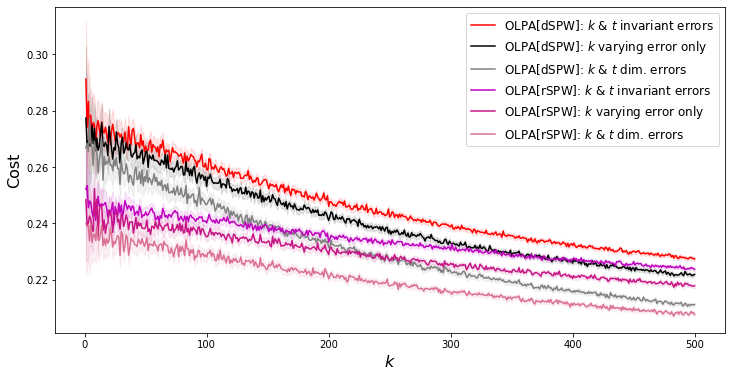

In [282]:
avg_sol = np.mean(sol_vals, axis=1)
ci_sol = 1.96 * np.std(sol_vals,axis=1)/np.sqrt(repeat)

avg_solk = np.mean(solk_vals, axis=1)
ci_solk = 1.96 * np.std(solk_vals,axis=1)/np.sqrt(repeat)

avg_solkt = np.mean(solkt_vals, axis=1)
ci_solkt = 1.96 * np.std(solkt_vals,axis=1)/np.sqrt(repeat)

avg_rand = np.mean(rand_vals, axis=1)
ci_rand = 1.96 * np.std(rand_vals,axis=1)/np.sqrt(repeat)

avg_randk = np.mean(randk_vals, axis=1)
ci_randk = 1.96 * np.std(randk_vals,axis=1)/np.sqrt(repeat)

avg_randkt = np.mean(randkt_vals, axis=1)
ci_randkt = 1.96 * np.std(randkt_vals,axis=1)/np.sqrt(repeat)

avg_min = np.mean(min_vals, axis=1)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)


plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams["figure.figsize"] = (6,4)

plt.clf()
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# plt.boxplot(r_ratio.transpose());

positions = k_list # np.arange(1, len(k_list)+1)

# plt.plot(positions, avg_sol, label="Round & time invariant error", color='r')
plt.plot(positions, avg_sol, label="OLPA[dSPW]: $k$ & $t$ invariant errors", color='r')
plt.fill_between(positions, (avg_sol-ci_sol), (avg_sol+ci_sol), color='r', alpha=.1)

plt.plot(positions, avg_solk, label="OLPA[dSPW]: $k$ varying error only", color='k')
plt.fill_between(positions, (avg_solk-ci_solk), (avg_solk+ci_solk), color='k', alpha=.1)

plt.plot(positions, avg_solkt, label="OLPA[dSPW]: $k$ & $t$ dim. errors", color='grey')
plt.fill_between(positions, (avg_solkt-ci_solkt), (avg_solkt+ci_solkt), color='grey', alpha=.1)


plt.plot(positions, avg_rand, label="OLPA[rSPW]: $k$ & $t$ invariant errors", color='m')
plt.fill_between(positions, (avg_rand-ci_rand), (avg_rand+ci_rand), color='m', alpha=.1)

plt.plot(positions, avg_randk, label="OLPA[rSPW]: $k$ varying error only", color='mediumvioletred')
plt.fill_between(positions, (avg_randk-ci_randk), (avg_randk+ci_randk), color='mediumvioletred', alpha=.1)

plt.plot(positions, avg_randkt, label="OLPA[rSPW]: $k$ & $t$ dim. errors", color='palevioletred')
plt.fill_between(positions, (avg_randkt-ci_randkt), (avg_randkt+ci_randkt), color='palevioletred', alpha=.1)


# plt.plot(positions, avg_min, label="Min.", color='b')
# plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

# plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
# plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

# formated_list = [elem for elem in k_list ]
# plt.xticks(positions, formated_list);
# plt.xlim([-1,500])
# plt.ylim([0.15,0.35])

plt.legend(loc='upper right', fontsize=12)
plt.savefig("plots/olpa-all.pdf", bbox_inches='tight')


# Experiment 4: MOLPA


In [163]:
reload(i); reload(a)
epsilon = .05
# B = .5
# theta = 2 * np.log(12 * B ** 2 / epsilon)
# K = int(np.ceil(12 * B ** 2 * theta / epsilon**2))
# print("Theoretical bound: k >=", K)
K = 500
S = 5
repeat = 30

k_list = np.linspace(100,K,10, dtype=int)


sol_vals = np.zeros((len(k_list), repeat))
min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("ðŸ”´ k = %-7d ðŸ•‘ %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        p_ins = i.MultiPredictInstance(K=k, S=S, w=w, normalize=True)  
        wind, min_R = a.MOLPA(p_ins, W=10, e=epsilon)
        sol_vals[idx, j] = wind
        min_vals[idx, j] = min_R
        print(" â†³rep %2d: molpa = %-3.2f  | min = %3.2f "%(j, wind, min_R))
    
print("Completed in %-4.2fs "%(time.time()-t1))

ðŸ”´ k = 100     ðŸ•‘ 0.00s      +0.00s
 â†³rep  0: molpa = 0.58  | min = 0.50 
 â†³rep  1: molpa = 0.59  | min = 0.51 
 â†³rep  2: molpa = 0.53  | min = 0.50 
 â†³rep  3: molpa = 0.61  | min = 0.50 
 â†³rep  4: molpa = 0.55  | min = 0.51 
 â†³rep  5: molpa = 0.57  | min = 0.50 
 â†³rep  6: molpa = 0.59  | min = 0.50 
 â†³rep  7: molpa = 0.55  | min = 0.51 
 â†³rep  8: molpa = 0.58  | min = 0.50 
 â†³rep  9: molpa = 0.54  | min = 0.50 
 â†³rep 10: molpa = 0.60  | min = 0.51 
 â†³rep 11: molpa = 0.62  | min = 0.50 
 â†³rep 12: molpa = 0.54  | min = 0.50 
 â†³rep 13: molpa = 0.53  | min = 0.51 
 â†³rep 14: molpa = 0.54  | min = 0.50 
 â†³rep 15: molpa = 0.51  | min = 0.50 
 â†³rep 16: molpa = 0.58  | min = 0.51 
 â†³rep 17: molpa = 0.53  | min = 0.51 
 â†³rep 18: molpa = 0.52  | min = 0.50 
 â†³rep 19: molpa = 0.54  | min = 0.50 
 â†³rep 20: molpa = 0.58  | min = 0.50 
 â†³rep 21: molpa = 0.57  | min = 0.51 
 â†³rep 22: molpa = 0.57  | min = 0.50 
 â†³rep 23: molpa = 0.56  | min = 0.49 


 â†³rep 29: molpa = 0.57  | min = 0.50 
ðŸ”´ k = 411     ðŸ•‘ 294.37s      +65.80s
 â†³rep  0: molpa = 0.55  | min = 0.50 
 â†³rep  1: molpa = 0.55  | min = 0.50 
 â†³rep  2: molpa = 0.53  | min = 0.50 
 â†³rep  3: molpa = 0.54  | min = 0.50 
 â†³rep  4: molpa = 0.54  | min = 0.50 
 â†³rep  5: molpa = 0.56  | min = 0.50 
 â†³rep  6: molpa = 0.59  | min = 0.50 
 â†³rep  7: molpa = 0.55  | min = 0.50 
 â†³rep  8: molpa = 0.54  | min = 0.51 
 â†³rep  9: molpa = 0.56  | min = 0.50 
 â†³rep 10: molpa = 0.54  | min = 0.50 
 â†³rep 11: molpa = 0.56  | min = 0.50 
 â†³rep 12: molpa = 0.57  | min = 0.50 
 â†³rep 13: molpa = 0.57  | min = 0.50 
 â†³rep 14: molpa = 0.54  | min = 0.50 
 â†³rep 15: molpa = 0.56  | min = 0.50 
 â†³rep 16: molpa = 0.55  | min = 0.50 
 â†³rep 17: molpa = 0.55  | min = 0.50 
 â†³rep 18: molpa = 0.57  | min = 0.50 
 â†³rep 19: molpa = 0.56  | min = 0.50 
 â†³rep 20: molpa = 0.55  | min = 0.50 
 â†³rep 21: molpa = 0.57  | min = 0.50 
 â†³rep 22: molpa = 0.56  | min = 0.5

In [5]:
# np.savez("data/molpa_alg=dpoa_S=5sol_vals10,5000,20",sol_vals = sol_vals, min_vals = min_vals)

In [159]:
f = np.load("data/molpa_alg=dpoa_S=5sol_vals10,5000,20.npz")
sol_vals = f["sol_vals"]
min_vals = f["min_vals"]


In [ ]:
avg_sol = np.mean(sol_vals, axis=1)
avg_min = np.mean(min_vals, axis=1)
ci_sol = 1.96 * np.std(sol_vals,axis=1)/np.sqrt(repeat)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)



plt.clf()
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# plt.boxplot(r_ratio.transpose());

positions = k_list #np.arange(1, len(k_list)+1)

plt.plot(positions, avg_sol, label="MOLPA", color='r')
plt.fill_between(positions, (avg_sol-ci_sol), (avg_sol+ci_sol), color='r', alpha=.1)

plt.plot(positions, avg_min, label="Min.", color='b')
plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

# formated_list = [elem for elem in k_list ]
# plt.xticks(positions, formated_list);
plt.legend(loc='upper right', fontsize=12)
# plt.xticks(rotation=45);

# Experiment 5: Comparison with Google

In [117]:
reload(a); reload(a_g); reload(i)
B = 20
w_list = np.linspace(0,0.999,100)
repeat = 10000
std = 90

alg_ratio = np.zeros((len(w_list), repeat))
alg_ratio_dim = np.zeros((len(w_list), repeat))

rand_ratio = np.zeros((len(w_list), repeat))
rand_ratio_dim = np.zeros((len(w_list), repeat))

google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

t1 = time.time()
t_ = t1
for idx,w in enumerate(w_list):
    print("ðŸ”´ w = %-.2f ðŸ•‘ %-4.2fs      +%-4.2fs"%(w, time.time()-t1, time.time()-t_))
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
        alg_d = a.DPOA(ins, w=w)
        rand_d = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        
        ins.time_dependant = False
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)

        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        alg_ratio_dim[idx,j] = alg_d/opt
        rand_ratio[idx,j] = rand/opt
        rand_ratio_dim[idx,j] = rand_d/opt
        
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
        
        
print("Completed in %-4.2fs "%(time.time()-t1))

ðŸ”´ w = 0.00 ðŸ•‘ 0.00s      +0.00s
ðŸ”´ w = 0.01 ðŸ•‘ 4.79s      +4.79s
ðŸ”´ w = 0.02 ðŸ•‘ 9.56s      +9.56s
ðŸ”´ w = 0.03 ðŸ•‘ 14.40s      +14.40s
ðŸ”´ w = 0.04 ðŸ•‘ 19.13s      +19.13s
ðŸ”´ w = 0.05 ðŸ•‘ 23.90s      +23.90s
ðŸ”´ w = 0.06 ðŸ•‘ 28.59s      +28.59s
ðŸ”´ w = 0.07 ðŸ•‘ 33.26s      +33.26s
ðŸ”´ w = 0.08 ðŸ•‘ 37.89s      +37.89s
ðŸ”´ w = 0.09 ðŸ•‘ 42.55s      +42.55s
ðŸ”´ w = 0.10 ðŸ•‘ 47.32s      +47.32s
ðŸ”´ w = 0.11 ðŸ•‘ 52.13s      +52.13s
ðŸ”´ w = 0.12 ðŸ•‘ 56.72s      +56.72s
ðŸ”´ w = 0.13 ðŸ•‘ 61.34s      +61.34s
ðŸ”´ w = 0.14 ðŸ•‘ 65.82s      +65.82s
ðŸ”´ w = 0.15 ðŸ•‘ 70.28s      +70.28s
ðŸ”´ w = 0.16 ðŸ•‘ 74.56s      +74.56s
ðŸ”´ w = 0.17 ðŸ•‘ 78.87s      +78.87s
ðŸ”´ w = 0.18 ðŸ•‘ 83.15s      +83.15s
ðŸ”´ w = 0.19 ðŸ•‘ 87.47s      +87.47s
ðŸ”´ w = 0.20 ðŸ•‘ 91.81s      +91.81s
ðŸ”´ w = 0.21 ðŸ•‘ 95.92s      +95.92s
ðŸ”´ w = 0.22 ðŸ•‘ 100.14s      +100.14s
ðŸ”´ w = 0.23 ðŸ•‘ 104.38s      +104.38s
ðŸ”´ w = 0.24 ðŸ•‘ 108.57s      +108.57s
ðŸ”´ w = 0.25 ðŸ•‘ 112.74

In [119]:
# np.savez("data/algs-google-omega_std=90",
# alg_ratio = alg_ratio,
# alg_ratio_dim = alg_ratio_dim,
# rand_ratio = rand_ratio,
# rand_ratio_dim = rand_ratio_dim,
# google_ratio = google_ratio,
# google_r_ratio = google_r_ratio)

In [142]:
f = np.load("data/algs-google-omega_std=10.npz")
alg_ratio = f["alg_ratio"]
alg_ratio_dim = f["alg_ratio_dim"]
rand_ratio = f["rand_ratio"]
rand_ratio_dim = f["rand_ratio_dim"]
google_ratio = f["google_ratio"]
google_r_ratio = f["google_r_ratio"]

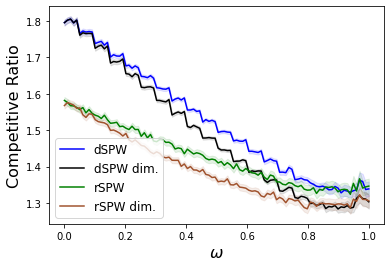

In [145]:

avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_dim = np.mean(alg_ratio_dim, axis=1)
ci_dim = 1.96 * np.std(alg_ratio_dim,axis=1)/np.sqrt(repeat)

avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio_dim = np.mean(rand_ratio_dim, axis=1)
ci_r_dim = 1.96 * np.std(rand_ratio_dim,axis=1)/np.sqrt(repeat)

avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = w_list #np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_ratio_dim, label="dSPW dim.", color='k')
plt.fill_between(positions, (avg_ratio_dim-ci_dim), (avg_ratio_dim+ci_dim), color='k', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)

plt.plot(positions, avg_r_ratio_dim, label="rSPW dim.", color='sienna')
plt.fill_between(positions, (avg_r_ratio_dim-ci_r_dim), (avg_r_ratio_dim+ci_r_dim), color='sienna', alpha=.1)

# plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
# plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

# plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
# plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='y', alpha=.1)


# formated_list = ['%.2f' % elem for elem in w_list ]
# plt.xticks(positions, formated_list);

plt.legend(loc='lower left', fontsize=12)
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)
plt.savefig("plots/compare-omega.pdf", bbox_inches='tight')
# plt.savefig("plots/google-omega.pdf", bbox_inches='tight')


### Against $\sigma$

In [67]:
reload(a); reload(a_g); reload(i)
w=0.5
repeat = 10000
std_list = np.arange(0,100,1)

alg_ratio = np.zeros((len(std_list), repeat))
alg_ratio_dim = np.zeros((len(std_list), repeat))
rand_ratio = np.zeros((len(std_list), repeat))
rand_ratio_dim = np.zeros((len(std_list), repeat))
google_ratio = np.zeros((len(std_list), repeat))
google_r_ratio = np.zeros((len(std_list), repeat))

t1 = time.time()
t_ = t1
for idx,std in enumerate(std_list):
    print("ðŸ”´ std = %-2d ðŸ•‘ %4.2fs      +%-4.2fs"%(std, time.time()-t1, time.time()-t_))
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
        alg_d = a.DPOA(ins, w=w)
        rand_d = a.RPOA(ins, w=w)
        
        ins.time_dependant = False
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        alg_ratio_dim[idx,j] = alg_d/opt
        rand_ratio[idx,j] = rand/opt
        rand_ratio_dim[idx,j] = rand_d/opt
        
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
print("Completed in %-4.2fs "%(time.time()-t1))


ðŸ”´ w = 0  ðŸ•‘ 0.00s      +0.00s
ðŸ”´ w = 1  ðŸ•‘ 2.67s      +2.67s
ðŸ”´ w = 2  ðŸ•‘ 5.80s      +5.80s
ðŸ”´ w = 3  ðŸ•‘ 8.89s      +8.89s
ðŸ”´ w = 4  ðŸ•‘ 11.99s      +11.99s
ðŸ”´ w = 5  ðŸ•‘ 15.14s      +15.14s
ðŸ”´ w = 6  ðŸ•‘ 18.24s      +18.24s
ðŸ”´ w = 7  ðŸ•‘ 21.36s      +21.36s
ðŸ”´ w = 8  ðŸ•‘ 24.50s      +24.50s
ðŸ”´ w = 9  ðŸ•‘ 27.58s      +27.58s
ðŸ”´ w = 10 ðŸ•‘ 30.63s      +30.63s
ðŸ”´ w = 11 ðŸ•‘ 33.70s      +33.70s
ðŸ”´ w = 12 ðŸ•‘ 36.75s      +36.75s
ðŸ”´ w = 13 ðŸ•‘ 39.82s      +39.82s
ðŸ”´ w = 14 ðŸ•‘ 42.88s      +42.88s
ðŸ”´ w = 15 ðŸ•‘ 45.93s      +45.93s
ðŸ”´ w = 16 ðŸ•‘ 49.00s      +49.00s
ðŸ”´ w = 17 ðŸ•‘ 52.07s      +52.07s
ðŸ”´ w = 18 ðŸ•‘ 55.11s      +55.11s
ðŸ”´ w = 19 ðŸ•‘ 58.16s      +58.16s
ðŸ”´ w = 20 ðŸ•‘ 61.20s      +61.20s
ðŸ”´ w = 21 ðŸ•‘ 64.21s      +64.21s
ðŸ”´ w = 22 ðŸ•‘ 67.27s      +67.27s
ðŸ”´ w = 23 ðŸ•‘ 70.34s      +70.34s
ðŸ”´ w = 24 ðŸ•‘ 73.41s      +73.41s
ðŸ”´ w = 25 ðŸ•‘ 76.51s      +76.51s
ðŸ”´ w = 26 ðŸ•‘ 79.59s      +79.59s
ðŸ”´ w = 

In [68]:
# np.savez("data/algs-google-sigma",
# alg_ratio = alg_ratio,
# alg_ratio_dim = alg_ratio_dim,
# rand_ratio = rand_ratio,
# rand_ratio_dim = rand_ratio_dim,
# google_ratio = google_ratio,
# google_r_ratio = google_r_ratio)

In [147]:
f = np.load("data/algs-google-sigma_w=0.5.npz")
alg_ratio = f["alg_ratio"]
alg_ratio_dim = f["alg_ratio_dim"]
rand_ratio = f["rand_ratio"]
rand_ratio_dim = f["rand_ratio_dim"]
google_ratio = f["google_ratio"]
google_r_ratio = f["google_r_ratio"]

In [149]:
avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_dim = np.mean(alg_ratio_dim, axis=1)
ci_dim = 1.96 * np.std(alg_ratio_dim,axis=1)/np.sqrt(repeat)

avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio_dim = np.mean(rand_ratio_dim, axis=1)
ci_r_dim = 1.96 * np.std(rand_ratio_dim,axis=1)/np.sqrt(repeat)

avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = std_list # np.arange(1, len(std_list)+1)
plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_ratio_dim, label="dSPW dim.", color='k')
plt.fill_between(positions, (avg_ratio_dim-ci_dim), (avg_ratio_dim+ci_dim), color='k', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)

plt.plot(positions, avg_r_ratio_dim, label="rSPW dim.", color='sienna', linestyle="-")
plt.fill_between(positions, (avg_r_ratio_dim-ci_r_dim), (avg_r_ratio_dim+ci_r_dim), color='sienna', alpha=.1)

# plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
# plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

# plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
# plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='y', alpha=.1)


# formated_list = ['%d' % elem for elem in std_list ]
# plt.xticks(positions, formated_list);

plt.legend(loc='lower right', fontsize=12)
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)
plt.savefig("plots/compare-std.pdf", bbox_inches='tight')
# plt.savefig("plots/google-std.pdf", bbox_inches='tight')
